In [1]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
from pyspark.sql.types import StructField, StructType, StringType, DoubleType, IntegerType
mySchema = StructType([
StructField("Ticker", StringType(), True),
StructField("DTYYYYMMDD", StringType(), True),
StructField("OpenFixed(K)", DoubleType(), True),
StructField("HighFixed(K)", DoubleType(), True),
StructField("LowFixed(K)", DoubleType(), True),
StructField("CloseFixed(K)", DoubleType(), True),
StructField("Volume", IntegerType(), True),
])

In [ ]:
df = spark.read.csv("/content/drive/MyDrive/excel_acb.csv", header = True,schema = mySchema  )

In [ ]:
df1 = spark.read.csv("/content/drive/MyDrive/BiGData/SOICT20221-BigData-FinancialPlatform-main/SOICT20221-BigData-FinancialPlatform-main/data/data_olhc/excel_bab.csv", header = True,schema = mySchema  )

In [ ]:
df2 = spark.read.csv("/content/drive/MyDrive/BiGData/SOICT20221-BigData-FinancialPlatform-main/SOICT20221-BigData-FinancialPlatform-main/data/data_olhc/excel_bid.csv", header = True,schema = mySchema  )

In [ ]:
df2.describe().show()

+-------+------+-------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|Ticker|         DTYYYYMMDD|      OpenFixed(K)|      HighFixed(K)|      LowFixed(K)|     CloseFixed(K)|            Volume|
+-------+------+-------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|  2195|               2195|              2195|              2195|             2195|              2195|              2195|
|   mean|  null|2.018042415854214E7|23.284959179954477|23.651693758542148|22.95334706150342| 23.29612305239183|1926371.3348519362|
| stddev|  null|  25358.72136407868|10.019237221095722|10.189634458760331|9.857505040833992|10.011983075274246|1501401.5567782235|
|    min|   BID|           20140124|            8.0064|            8.0699|           7.9428|            8.0064|             51430|
|    max|   BID|           20221114|              49.5|             49.95|         

In [ ]:
df1.describe().show()

+-------+------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Ticker|         DTYYYYMMDD|      OpenFixed(K)|      HighFixed(K)|       LowFixed(K)|     CloseFixed(K)|            Volume|
+-------+------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|  1219|               1219|              1219|              1219|              1219|              1219|              1219|
|   mean|  null|2.020004455947498E7|19.739427317473275|19.839055619360096|19.602865709598007| 19.72524306808853|25766.484003281377|
| stddev|  null|  13942.47281760372|2.6608470989376247|2.6886150174290475| 2.594339469621194|2.6239899509275753| 58373.97262556892|
|    min|   BAB|           20171228|              13.2|              13.4|              13.0|              13.0|                 0|
|    max|   BAB|           20221114|           31.7933|           31.8804|  

In [ ]:
def Query(start, end, kind, ticker):
  url = "data/data_olhc/excel_"+ ticker +".csv"
  df = spark.read.csv(url, header = True, schema = mySchema)
  ans = df.select("DTYYYYMMDD", kind).where((df["DTYYYYMMDD"]>start) & (df["DTYYYYMMDD"]<end))
  return ans

In [ ]:
hehe = Query(20150000, 20230000,"CloseFixed(K)","bab" )

In [ ]:
hehe.show()

+----------+-------------+
|DTYYYYMMDD|CloseFixed(K)|
+----------+-------------+
|  20171228|         23.0|
|  20171229|         25.0|
|  20180102|         26.0|
|  20180103|         26.0|
|  20180104|         25.5|
|  20180105|         25.5|
|  20180108|         25.2|
|  20180109|         24.0|
|  20180110|         24.5|
|  20180111|         24.5|
|  20180112|         25.0|
|  20180115|         26.6|
|  20180116|         24.5|
|  20180117|         24.5|
|  20180118|         24.5|
|  20180119|         24.5|
|  20180122|         24.5|
|  20180123|         25.0|
|  20180124|         26.4|
|  20180125|         26.9|
+----------+-------------+
only showing top 20 rows



In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
x = hehe.select("DTYYYYMMDD").collect()

In [ ]:
y = hehe.select("CloseFixed(K)").collect()

In [ ]:
xarray = np.array([row["DTYYYYMMDD"] for row in x])

In [ ]:
yarray = np.array([row["CloseFixed(K)"] for row in y])

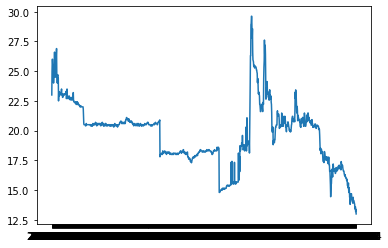

In [ ]:
plt.plot(xarray,yarray)
plt.show()

In [ ]:
df1.select("CloseFixed(K)").describe().show()

+-------+------------------+
|summary|     CloseFixed(K)|
+-------+------------------+
|  count|              1219|
|   mean| 19.72524306808853|
| stddev|2.6239899509275753|
|    min|              13.0|
|    max|           29.6157|
+-------+------------------+



In [ ]:
df1.describe().show()

+-------+------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Ticker|         DTYYYYMMDD|      OpenFixed(K)|      HighFixed(K)|       LowFixed(K)|     CloseFixed(K)|            Volume|
+-------+------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|  1219|               1219|              1219|              1219|              1219|              1219|              1219|
|   mean|  null|2.020004455947498E7|19.739427317473275|19.839055619360096|19.602865709598007| 19.72524306808853|25766.484003281377|
| stddev|  null|  13942.47281760372|2.6608470989376247|2.6886150174290475| 2.594339469621194|2.6239899509275753| 58373.97262556892|
|    min|   BAB|           20171228|              13.2|              13.4|              13.0|              13.0|                 0|
|    max|   BAB|           20221114|           31.7933|           31.8804|  

In [ ]:
df.describe().show()

+-------+------+--------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Ticker|          DTYYYYMMDD|      OpenFixed(K)|      HighFixed(K)|       LowFixed(K)|     CloseFixed(K)|            Volume|
+-------+------+--------------------+------------------+------------------+------------------+------------------+------------------+
|  count|  3987|                3987|              3987|              3987|              3987|              3987|              3987|
|   mean|  null|2.0144511650112867E7|10.507720065211917|10.664507298720759|10.328102558314486|10.491606119889607|1960654.3905191873|
| stddev|  null|   46150.15001623645|14.051447622909416|14.362431453445202|13.637635543521142|13.974954776209403|3021535.8510378767|
|    min|   ACB|            20061121|              2.76|            2.9173|              2.76|            2.8601|                 0|
|    max|   ACB|            20221114|             157.0|             

In [ ]:
df.show()

+------+----------+------------+------------+-----------+-------------+------+
|Ticker|DTYYYYMMDD|OpenFixed(K)|HighFixed(K)|LowFixed(K)|CloseFixed(K)|Volume|
+------+----------+------------+------------+-----------+-------------+------+
|   ACB|      null|       120.0|       150.0|      119.0|        130.2| 56500|
|   ACB|      null|       143.2|       143.2|      130.0|        134.7| 62300|
|   ACB|      null|       145.0|       145.0|      130.0|        138.4| 69900|
|   ACB|      null|       140.0|       152.0|      140.0|        146.8| 63600|
|   ACB|      null|       146.8|       161.4|      135.0|        146.8| 42400|
|   ACB|      null|       150.0|       150.0|      140.0|        143.2| 19800|
|   ACB|      null|       140.0|       142.0|      133.0|        137.9| 30900|
|   ACB|      null|       132.0|       135.0|      129.0|        131.5| 66200|
|   ACB|      null|       133.0|       133.0|      130.0|        131.0| 59300|
|   ACB|      null|       131.0|       131.0|      1

In [ ]:
df.describe().show()

+-------+------+--------------------+------------------+------------------+------------------+------------------+------------------+
|summary|Ticker|          DTYYYYMMDD|      OpenFixed(K)|      HighFixed(K)|       LowFixed(K)|     CloseFixed(K)|            Volume|
+-------+------+--------------------+------------------+------------------+------------------+------------------+------------------+
|  count|  3987|                3987|              3987|              3987|              3987|              3987|              3987|
|   mean|  null|2.0144511650112867E7|10.507720065211917|10.664507298720759|10.328102558314486|10.491606119889607|1960654.3905191873|
| stddev|  null|   46150.15001623645|14.051447622909416|14.362431453445202|13.637635543521142|13.974954776209403|3021535.8510378767|
|    min|   ACB|            20061121|              2.76|            2.9173|              2.76|            2.8601|                 0|
|    max|   ACB|            20221114|             157.0|             

In [ ]:
row1 = df.agg({"HighFixed(K)":"max"}).collect()[0]
row1["max(HighFixed(K))"]

'9.9988'

In [ ]:
row1 = df.agg({"HighFixed(K)":"min"}).collect()[0]
row1["min(HighFixed(K))"]

2.91729998588562